In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-23 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.1
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile
import IPython

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Seeing sound!

In [3]:
# NOTE: This is only works with 1 channel (mono).  To record a mono audio sample,
# you can use this command: rec -r 44100 -c 1 -b 16 test.wav
(sample_rate, input_signal) = scipy.io.wavfile.read("audio_files/vowel_ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

/srv/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:129: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = numpy.fromstring(fid.read(size), dtype=dtype)


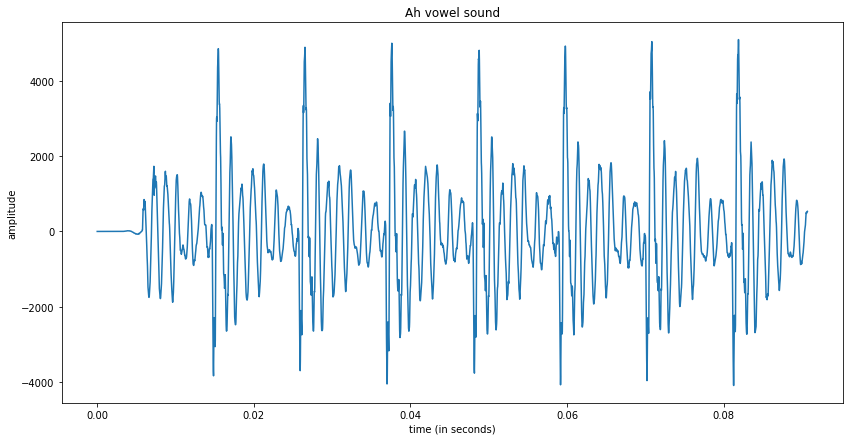

In [4]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

In [5]:
#IPython.display.Audio("audio_files/vowel_ah.wav")

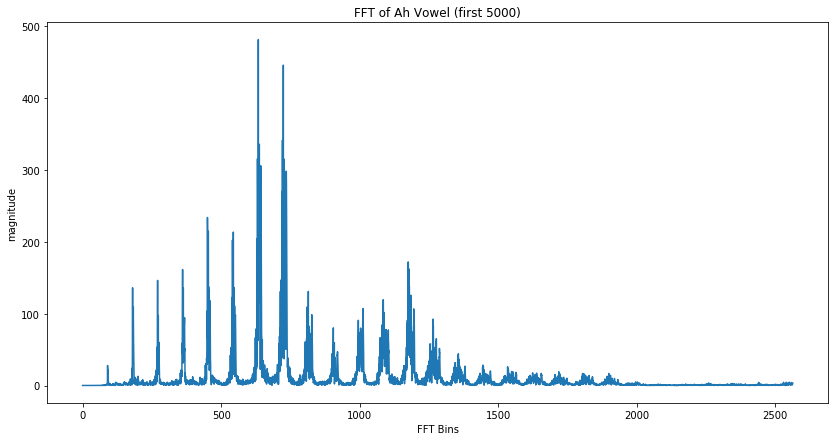

In [6]:
fft_out = np.fft.rfft(input_signal)
fft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(fft_out) for i in fft_out]
num_samples = len(input_signal)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

setup_graph(title='FFT of Ah Vowel (first 5000)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

## Few notes about this

* Ratio of harmonics = **timbre** = This is what makes different people's voices sound different (and different from violins)
    - Even if they are singing the same note, and the same volume
* Possible application: synthesizing new sounds (with different harmonic profiles)
    - Example: If you changed the ratio of the harmonics, you could make your voice sound like something else (Darth Vader?)

# Spectrogram (FFT over time)

### Axes

* x-axis: time
* y-axis: frequency
* z-axis (color): strength of each frequency

### See the Harmonics!

In [7]:
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("audio_files/do-re-mi.wav")

/srv/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:129: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = numpy.fromstring(fid.read(size), dtype=dtype)


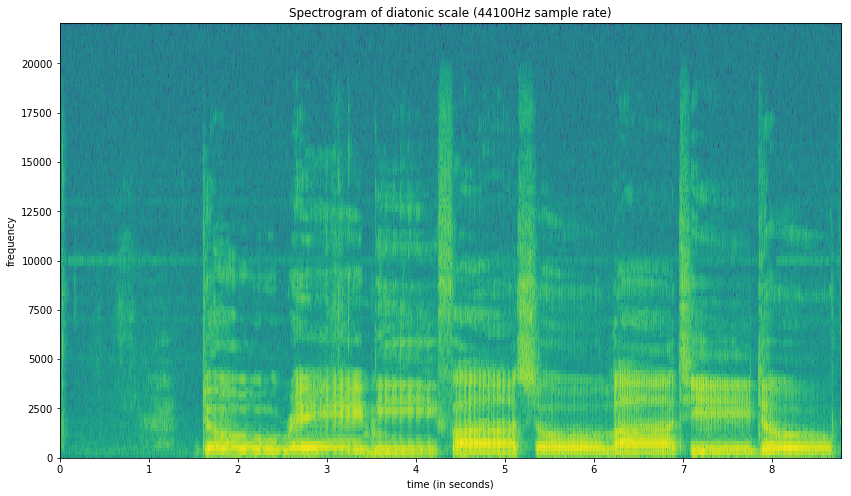

In [8]:
setup_graph(title='Spectrogram of diatonic scale (44100Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(doremi, Fs=doremi_sample_rate)

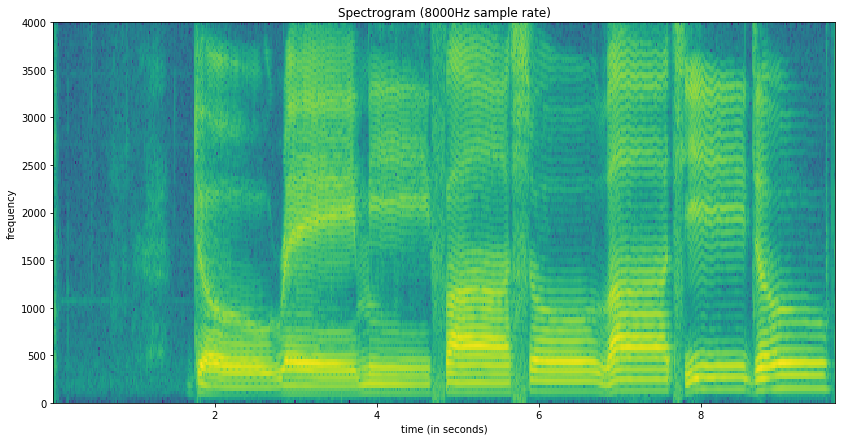

In [9]:
doremi_8000hz = [doremi[i] for i in range(0, len(doremi), 44100//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000)

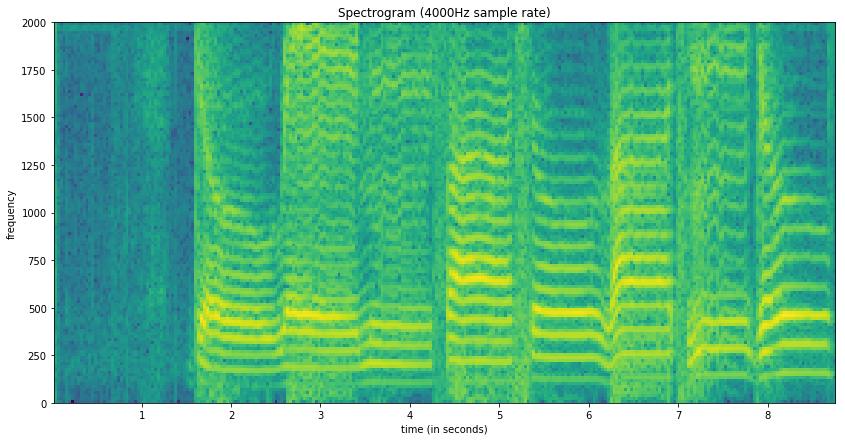

In [10]:
doremi_4000hz = [doremi[i] for i in range(0, len(doremi), 44100//4000)]
setup_graph(title='Spectrogram (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_4000hz, Fs=4000)

## A few things to note

* Something that sounds like a single note actually is made up of a bunch of harmonics
* Harmonics are integer multiples of the *fundamental frequency*
* Notice that the spacing between the harmonics of the first note is about double of the spacing between the harmonics in the last note (1 octave difference)

In [11]:
# Cleanup to reduce notebook size
del input_signal, time_array, rfreqs, doremi, fft_out, fft_mag, doremi_4000hz, doremi_8000hz, _